<a href="https://colab.research.google.com/github/NumKate/CSST101-CS3B/blob/main/CS3B_MACASAET_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic 2.2: Bayesian Networks**

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

In [4]:
#Define the structure of the Bayesian Network
model = BayesianModel ([('Weather', 'Traffic'), ('Traffic', 'Late')])

In [5]:
#Weather CPD
cpd_weather = TabularCPD (variable = 'Weather', variable_card = 2, values = [[0.8], [0.2]])

#Traffic CPD given Weather
cpd_traffic = TabularCPD (variable = 'Traffic', variable_card = 2, values = [[0.9, 0.5], [0.1, 0.5]], evidence = ['Weather'], evidence_card = [2])

#Late CPD given Traffic
cpd_late = TabularCPD (variable = 'Late', variable_card = 2, values = [[0.95, 0.4], [0.05, 0.6]], evidence = ['Traffic'], evidence_card = [2])

#Add CPDs to the model
model.add_cpds (cpd_weather, cpd_traffic, cpd_late)

#Check if the model is valid
assert model.check_model()

In [6]:
#Create an inference object
inference = VariableElimination (model)

#Query the probability of being late given that Weather is Rainy
result = inference.query (variables = ['Late'], evidence = {'Weather': 1})
print (result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


In [7]:
#Create a synthetic dataset
#0 for Sunny, 1 for Rainy
data = pd.DataFrame ({'Weather': np.random.choice([0, 1], size = 1000, p=[0.8, 0.2]),
                      'Traffic' : np.nan,
                      'Late' : np.nan})

#Fill Traffic based on weather
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 0].shape[0], p = [0.9, 0.1])

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 1].shape[0], p = [0.5, 0.5])

#Fill later based on Traffic
data['Late'] = np.where (data ['Traffic'] ==0, np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
                         np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6]))

In [8]:
from pgmpy.estimators import MaximumLikelihoodEstimator

#Create an Bayesian Model
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

#Fit the model to the data using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

#Check the estimated CPDs
for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.804 |
+------------+-------+
| Weather(1) | 0.196 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.8992537313432836  | 0.4744897959183674 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.10074626865671642 | 0.5255102040816326 |
+--------------+---------------------+--------------------+
+---------+--------------------+---------------------+
| Traffic | Traffic(0.0)       | Traffic(1.0)        |
+---------+--------------------+---------------------+
| Late(0) | 0.9607843137254902 | 0.41847826086956524 |
+---------+--------------------+---------------------+
| Late(1) | 0.0392156862745098 | 0.5815217391304348  |
+---------+--------------------+---------------------+


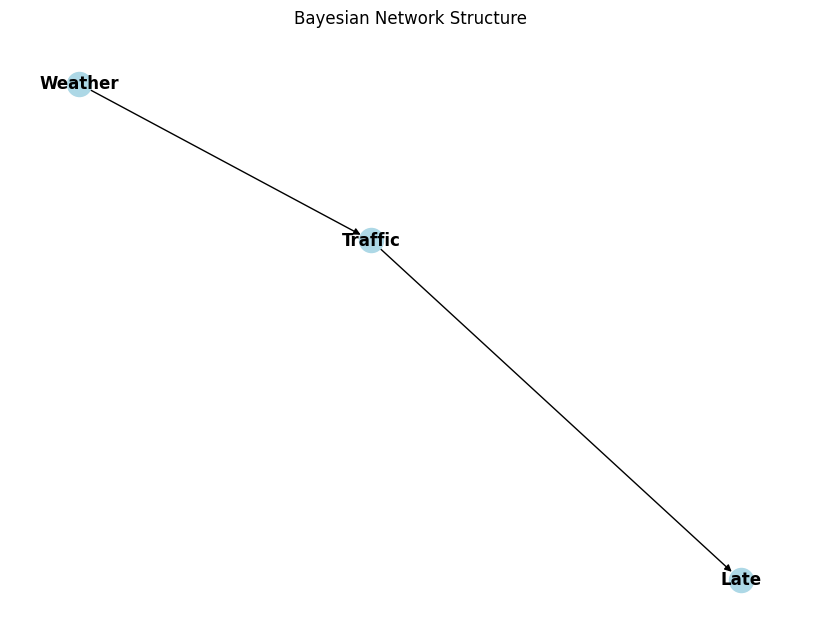

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

# Create a Bayesian Model
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Manually convert the Bayesian Network to a NetworkX graph
nx_graph = nx.DiGraph()

# Add nodes and edges from the Bayesian Network to the NetworkX graph
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(8, 6))

pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True
)

plt.title('Bayesian Network Structure')
plt.show()
